In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
# Extract data from the dictionary
data2 = {'LOC': {'precision': 0.013440860215053764,
                 'recall': 0.04196642685851319,
                 'f1-score': 0.02036067481093659,
                 'support': 1668.0},
         'PER': {'precision': 0.01267688679245283,
                 'recall': 0.026592455163883734,
                 'f1-score': 0.017169095627869835,
                 'support': 1617.0},
         'MISC': {'precision': 0.019439679817038306,
                  'recall': 0.04843304843304843,
                  'f1-score': 0.0277437780497756,
                  'support': 702.0},
         'ORG': {'precision': 0.11739130434782609,
                 'recall': 0.01625526791089705,
                 'f1-score': 0.028556319407720784,
                 'support': 1661.0},
         'micro avg': {'precision': 0.01644767936477928,
                       'recall': 0.030807365439093484,
                       'f1-score': 0.021445738583841745,
                       'support': 5648.0},
         'macro avg': {'precision': 0.04073718279309275,
                       'recall': 0.0333117995915856,
                       'f1-score': 0.023457466974075702,
                       'support': 5648.0},
         'weighted avg': {'precision': 0.044538153777515216,
                          'recall': 0.030807365439093484,
                          'f1-score': 0.022774825060565593,
                          'support': 5648.0}}

data2 = {key.upper().replace(" ", "-"): val for key, val in data2.items()}

# Extract labels
labels = list(data2.keys())

precision = [data2[label]['precision'] for label in labels]
recall = [data2[label]['recall'] for label in labels]
f1_score = [data2[label]['f1-score'] for label in labels]

# Create a numpy array for the heatmap
data_array = np.array([precision, recall, f1_score])

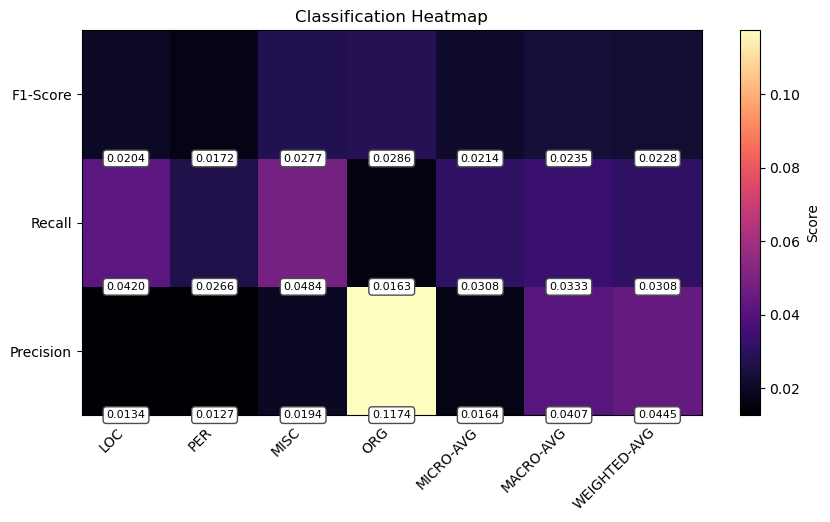

In [15]:
# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
heatmap = ax.pcolor(data_array, cmap=sns.color_palette("magma", as_cmap=True)
)

# Add labels and title
ax.set_xticks(np.arange(len(labels)) + 0.5)
ax.set_xticklabels(labels, rotation=45, ha='right')

ax.set_yticks(np.arange(3) + 0.5)
ax.set_yticklabels(["Precision", "Recall", "F1-Score"])

ax.set_title("Classification Heatmap")

# Add colorbar
fig.colorbar(heatmap, label="Score")


# Function to format cell text with values
def format_grid_value(value):
    return "{:.4f}".format(value)


# Loop through each cell and set the text with value
for (i, j), z in np.ndenumerate(data_array):
    ax.text(j + 0.5, i, format_grid_value(z), ha='center', va='center', fontsize=8,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

# Show the heatmap
# plt.tight_layout()
plt.show()